# Projeto 3 Fundamentos de Sistemas Inteligentes
Guilherme Rodrigues Lodron Pires - 170011780

## Instalando dependências utilizadas no projeto

In [ ]:
!pip install Pillow==9.0.0
!pip install labelme2coco
!pip install torchvision==0.5.0
!pip install torch==1.4.0
!pip install gdown

     |████████████████████████████████| 4.3 MB 14.6 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 79 kB 6.8 MB/s 
     |████████████████████████████████| 60.5 MB 1.2 MB/s 
     |████████████████████████████████| 87 kB 9.1 MB/s 
     |████████████████████████████████| 97 kB 8.6 MB/s 
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115942 sha256=90fef0ad9c70edeed65c29c4349363e64f4debc62b57381a164c488b1a958431
  Stored in directory: /root/.cache/pip/wheels/8a/67/fb/2e8a12fa16661b9d5af1f654bd199366799740a85c64981226
Successfully built fire
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following de

In [ ]:
import gdown
import labelme2coco
import glob
import os

In [ ]:
# Baixando arquivo de acesso ao repositório kaggle
gdown.download(id='16etXZaeyjoYAShA25Gb0l1xl82jN7NQ6')

Downloading...
From: https://drive.google.com/uc?id=16etXZaeyjoYAShA25Gb0l1xl82jN7NQ6
To: /content/kaggle.json
100%|██████████| 65.0/65.0 [00:00<00:00, 96.1kB/s]


'kaggle.json'

## Obtendo e manipulando dataset

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [ ]:
# Download do dataset
!kaggle datasets download -d usmanafzaal/strawberry-disease-detection-dataset --force

100% 532M/534M [00:09<00:00, 66.8MB/s]
100% 534M/534M [00:09<00:00, 58.9MB/s]


In [ ]:
!unzip strawberry-disease-detection-dataset.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: test/angular_leafspot351.jpg  
  inflating: test/angular_leafspot351.json  
  inflating: test/angular_leafspot352.jpg  
  inflating: test/angular_leafspot352.json  
  inflating: test/angular_leafspot353.jpg  
  inflating: test/angular_leafspot353.json  
  inflating: test/angular_leafspot354.jpg  
  inflating: test/angular_leafspot354.json  
  inflating: test/angular_leafspot355.jpg  
  inflating: test/angular_leafspot355.json  
  inflating: test/angular_leafspot357.jpg  
  inflating: test/angular_leafspot357.json  
  inflating: test/angular_leafspot358.jpg  
  inflating: test/angular_leafspot358.json  
  inflating: test/angular_leafspot359.jpg  
  inflating: test/angular_leafspot359.json  
  inflating: test/angular_leafspot360.jpg  
  inflating: test/angular_leafspot360.json  
  inflating: test/angular_leafspot362.jpg  
  inflating: test/angular_leafspot362.json  
  inflating: test/angular_leafspot363.jpg  
  infla

In [ ]:
# Convertendo anotações de label2me para formato ms coco
split_rate = 1

train_folder = 'train'
train_annotation = 'train_annotation'

test_folder = 'test'
test_annotation = 'test_annotation'

labelme2coco.convert(train_folder, train_annotation, split_rate)
labelme2coco.convert(test_folder, test_annotation, split_rate)

There are 1450 listed files in folder train.


Converting labelme annotations to COCO format: 100%|██████████| 1450/1450 [00:01<00:00, 922.66it/s]
04/25/2022 22:20:06 - INFO - labelme2coco -   Converted annotations in COCO format is exported to train_annotation/dataset.json


There are 743 listed files in folder test.


Converting labelme annotations to COCO format: 100%|██████████| 743/743 [00:00<00:00, 1162.38it/s]
04/25/2022 22:20:08 - INFO - labelme2coco -   Converted annotations in COCO format is exported to test_annotation/dataset.json


In [ ]:
# Removendo arquivos json indesejados
train_paths = glob.glob('train/*.json')
test_paths = glob.glob('test/*.json')
for path in train_paths:
    os.remove(path)
for path in test_paths:
    os.remove(path)

## Clonando projeto
- Clonando projeto do yolact
- Roda build para utilizar YOLACT++
- Baixa arquivo de configurações para o dataset escolhido
- Baixa peso inicial

In [ ]:
!git clone https://github.com/guilodron/yolact.git

Cloning into 'yolact'...
remote: Enumerating objects: 2941, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 2941 (delta 0), reused 4 (delta 0), pack-reused 2936
Receiving objects: 100% (2941/2941), 21.23 MiB | 28.56 MiB/s, done.
Resolving deltas: 100% (2002/2002), done.


In [ ]:
# Buildando DCNv2 para utilizar o YOLACT++
%cd /content/yolact/external/DCNv2/
!python setup.py build develop

/content/yolact/external/DCNv2
running build
running build_ext
building '_ext' extension
creating build
creating build/temp.linux-x86_64-3.7
creating build/temp.linux-x86_64-3.7/content
creating build/temp.linux-x86_64-3.7/content/yolact
creating build/temp.linux-x86_64-3.7/content/yolact/external
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src/cpu
creating build/temp.linux-x86_64-3.7/content/yolact/external/DCNv2/src/cuda
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fdebug-prefix-map=/build/python3.7-dIfpci/python3.7-3.7.13=. -fstack-protector-strong -Wformat -Werror=format-security -g -fdebug-prefix-map=/build/python3.7-dIfpci/python3.7-3.7.13=. -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -DWITH_CUDA -I/content/yolact/exte

In [ ]:
# Baixando peso inicial treinado anteriormente
%cd /content/yolact/
!mkdir weights
%cd weights

/content/yolact
mkdir: cannot create directory ‘weights’: File exists
/content/yolact/weights


In [ ]:
gdown.download(id='1KJD5rbIG7-SLke-lmWoAiVMm5znfPfz2')

Downloading...
From: https://drive.google.com/uc?id=1KJD5rbIG7-SLke-lmWoAiVMm5znfPfz2
To: /content/yolact/weights/yolact_plus_resnet50_strawberry_49_2214_interrupt.pth
100%|██████████| 129M/129M [00:01<00:00, 118MB/s]


'yolact_plus_resnet50_strawberry_49_2214_interrupt.pth'

## Treinando modelo

In [ ]:
%cd /content/yolact

/content/yolact


In [ ]:
# Treinando o modelo (caso queira resumir o treinamento, basta inserir o nome do arquivo de peso baixado nas cálulas anteriores)
!python train.py --config=yolact_plus_resnet50_strawberry_config --batch_size=32

Scaling parameters by 4.00 to account for a batch size of 32.
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Initializing weights...
Begin training!

/content/yolact/utils/augmentations.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mode = random.choice(self.sample_options)
/content/yolact/utils/augmentations.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  mode = random.choice(self.sample_options)
/content/yolact/utils/a

## Avaliando modelo em imagens de teste

In [ ]:
!python eval.py --trained_model=weights/yolact_plus_resnet50_strawberry_49_2214_interrupt.pth --score_threshold=0.15 --top_k=15 --images=../test:../output_images

Config not specified. Parsed yolact_plus_resnet50_strawberry_config from the file name.

Loading model... Done.

../test/powdery_mildew_leaf488.jpg -> ../output_images/powdery_mildew_leaf488.png
../test/gray_mold500.jpg -> ../output_images/gray_mold500.png
../test/gray_mold541.jpg -> ../output_images/gray_mold541.png
../test/leaf_spot501.jpg -> ../output_images/leaf_spot501.png
../test/gray_mold531.jpg -> ../output_images/gray_mold531.png
../test/gray_mold482.jpg -> ../output_images/gray_mold482.png
../test/powdery_mildew_leaf485.jpg -> ../output_images/powdery_mildew_leaf485.png
../test/angular_leafspot420.jpg -> ../output_images/angular_leafspot420.png
../test/leaf_spot552.jpg -> ../output_images/leaf_spot552.png
../test/angular_leafspot352.jpg -> ../output_images/angular_leafspot352.png
../test/powdery_mildew_leaf412.jpg -> ../output_images/powdery_mildew_leaf412.png
../test/angular_leafspot446.jpg -> ../output_images/angular_leafspot446.png
../test/gray_mold556.jpg -> ../output_ima

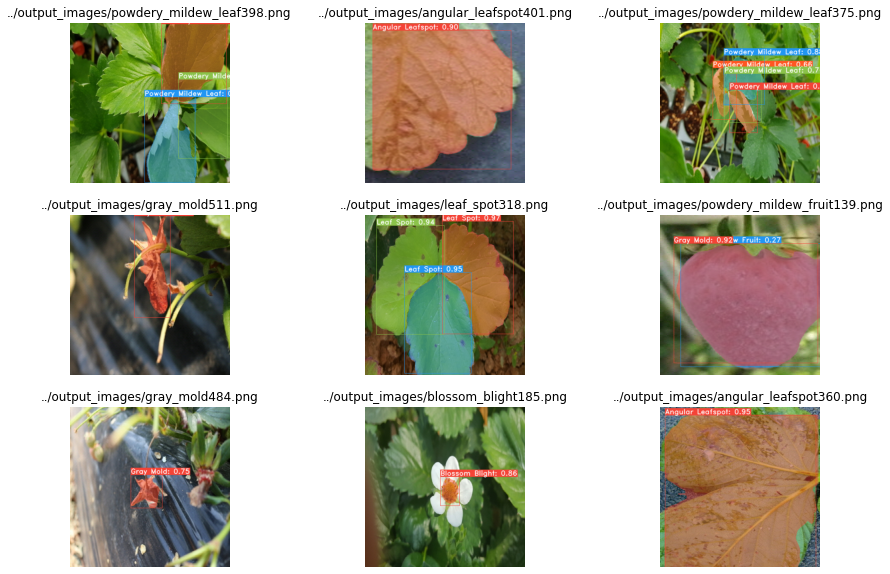

In [ ]:
# Observando algumas predições
import numpy as np
import matplotlib.pyplot as plt

output_images = glob.glob('../output_images/*.png')
random_indexes = np.random.choice(len(output_images), 9, replace=False)
# Inspecionando imagens classificadas errado
fig = plt.figure(figsize=(15,10))
j = 0
for i in random_indexes:
  ax = plt.subplot(3, 3, j + 1)
  j += 1
  plt.imshow(plt.imread(output_images[i]))
  plt.title(output_images[i])
  plt.axis("off")

## Analisando desempenho para cada classe

In [ ]:
!python eval.py --trained_model=weights/yolact_plus_resnet50_strawberry_49_2214_interrupt.pth

Config not specified. Parsed yolact_plus_resnet50_strawberry_config from the file name.

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Loading model... Done.

Processing Images  ██████████████████████████████    743 /    743 (100.00%)    23.88 fps        
Saving data...
Calculating mAP...
#################### Class: Angular Leafspot ####################

       |  all  |  .50  |  .55  |  .60  |  .65  |  .70  |  .75  |  .80  |  .85  |  .90  |  .95  |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+
   box | 10.22 | 16.42 | 16.20 | 15.78 | 15.13 | 13.68 | 11.93 |  8.59 |  3.67 |  0.72 |  0.03 |
  mask | 11.62 | 16.43 | 16.42 | 15.91 | 15.33 | 14.76 | 12.93 | 10.93 |  8.11 |  4.78 |  0.62 |
-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+-------+

#################### Class: Leaf Spot ####################

       |  all  |  .50  |  .55  |  .60  |  .65  |  .70  |  .7